<a href="https://colab.research.google.com/github/Jamesf50/UCDPA_JamesMcCaghey/blob/main/prem_league_21_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split ,TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
import warnings
warnings.filterwarnings("ignore")

In [656]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [657]:
file_path = '/content/drive/MyDrive/soccer21-22.csv'  # Replace 'filename.xlsx' with the actual file name and path
df = pd.read_csv(file_path)
print(df.head())


         Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  13/08/2021   Brentford         Arsenal     2     0   H     1     0   H   
1  14/08/2021  Man United           Leeds     5     1   H     1     0   H   
2  14/08/2021     Burnley        Brighton     1     2   A     1     0   H   
3  14/08/2021     Chelsea  Crystal Palace     3     0   H     2     0   H   
4  14/08/2021     Everton     Southampton     3     1   H     0     1   A   

     Referee  ...  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0   M Oliver  ...    3    4  12   8   2   5   0   0   0   0  
1  P Tierney  ...    8    3  11   9   5   4   1   2   0   0  
2    D Coote  ...    3    8  10   7   7   6   2   1   0   0  
3     J Moss  ...    6    1  15  11   5   2   0   0   0   0  
4   A Madley  ...    6    3  13  15   6   8   2   0   0   0  

[5 rows x 22 columns]


In [658]:
df[df.duplicated()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


In [659]:
df.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [660]:
df.Referee.unique()

array(['M Oliver', 'P Tierney', 'D Coote', 'J Moss', 'A Madley',
       'C Pawson', 'M Dean', 'A Marriner', 'M Atkinson', 'A Taylor',
       'D England', 'G Scott', 'S Attwell', 'P Bankes', 'R Jones',
       'K Friend', 'C Kavanagh', 'J Gillett', 'S Hooper', 'M Salisbury',
       'J Brooks', 'T Harrington'], dtype=object)

In [661]:
df.HomeTeam.unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

In [662]:
df.AwayTeam.unique()

array(['Arsenal', 'Leeds', 'Brighton', 'Crystal Palace', 'Southampton',
       'Wolves', 'Aston Villa', 'Liverpool', 'West Ham', 'Man City',
       'Burnley', 'Newcastle', 'Brentford', 'Everton', 'Norwich',
       'Watford', 'Man United', 'Tottenham', 'Chelsea', 'Leicester'],
      dtype=object)

In [663]:
df.shape

(380, 22)

In [664]:
no_of_teams = 20
home_and_away = 2
no_of_matches_per_week = no_of_teams/2
number_of_matches = home_and_away*(no_of_teams-1)*no_of_matches_per_week
number_of_matches == df.shape[0]

True

In [665]:
df.Referee.value_counts()

A Taylor        28
P Tierney       27
M Oliver        26
C Pawson        26
M Dean          26
M Atkinson      26
J Moss          25
D Coote         20
S Attwell       20
A Marriner      19
K Friend        18
C Kavanagh      18
A Madley        16
D England       15
S Hooper        15
G Scott         12
R Jones         12
P Bankes        12
J Gillett        9
J Brooks         4
M Salisbury      3
T Harrington     3
Name: Referee, dtype: int64

In [666]:
df.HomeTeam.value_counts()

Brentford         19
Man United        19
Arsenal           19
Wolves            19
Southampton       19
Brighton          19
Man City          19
Leeds             19
Crystal Palace    19
Aston Villa       19
Liverpool         19
Tottenham         19
Newcastle         19
Norwich           19
Watford           19
Leicester         19
Everton           19
Chelsea           19
Burnley           19
West Ham          19
Name: HomeTeam, dtype: int64

In [667]:
df.AwayTeam.value_counts()

Arsenal           19
Leeds             19
Chelsea           19
Tottenham         19
Man United        19
Watford           19
Norwich           19
Everton           19
Brentford         19
Newcastle         19
Burnley           19
Man City          19
West Ham          19
Liverpool         19
Aston Villa       19
Wolves            19
Southampton       19
Crystal Palace    19
Brighton          19
Leicester         19
Name: AwayTeam, dtype: int64

the data is clean

In [668]:
referees = pd.DataFrame(list(df.Referee.unique()),columns = ['Referee'])
referees

,Referee
0,M Oliver
1,P Tierney
2,D Coote
3,J Moss
4,A Madley
5,C Pawson
6,M Dean
7,A Marriner
8,M Atkinson
9,A Taylor


In [669]:
table = pd.DataFrame(list(df.HomeTeam.unique()),columns = ['Team'])
table

,Team
0,Brentford
1,Man United
2,Burnley
3,Chelsea
4,Everton
5,Leicester
6,Watford
7,Norwich
8,Newcastle
9,Tottenham


In [670]:
shot_conv = pd.DataFrame(list(df.HomeTeam.unique()), columns = ['Team'])
shot_conv

,Team
0,Brentford
1,Man United
2,Burnley
3,Chelsea
4,Everton
5,Leicester
6,Watford
7,Norwich
8,Newcastle
9,Tottenham


In [671]:
referees[['played', 'home fouls', 'away fouls', 'home cards', 'away cards', 'home yellow', 'away yellow','home red', 'away red', 'home win', 'away win', 'draw']]=0

In [672]:
referees

,Referee,played,home fouls,away fouls,home cards,away cards,home yellow,away yellow,home red,away red,home win,away win,draw
0,M Oliver,0,0,0,0,0,0,0,0,0,0,0,0
1,P Tierney,0,0,0,0,0,0,0,0,0,0,0,0
2,D Coote,0,0,0,0,0,0,0,0,0,0,0,0
3,J Moss,0,0,0,0,0,0,0,0,0,0,0,0
4,A Madley,0,0,0,0,0,0,0,0,0,0,0,0
5,C Pawson,0,0,0,0,0,0,0,0,0,0,0,0
6,M Dean,0,0,0,0,0,0,0,0,0,0,0,0
7,A Marriner,0,0,0,0,0,0,0,0,0,0,0,0
8,M Atkinson,0,0,0,0,0,0,0,0,0,0,0,0
9,A Taylor,0,0,0,0,0,0,0,0,0,0,0,0


In [673]:
table[['played', 'win', 'draw', 'loss', 'gf', 'ga', 'gd', 'points', 'fouls']]=0

In [674]:
shot_conv[['shots','shots on target', 'conversion rate', 'gf']]=0

In [675]:
table

,Team,played,win,draw,loss,gf,ga,gd,points,fouls
0,Brentford,0,0,0,0,0,0,0,0,0
1,Man United,0,0,0,0,0,0,0,0,0
2,Burnley,0,0,0,0,0,0,0,0,0
3,Chelsea,0,0,0,0,0,0,0,0,0
4,Everton,0,0,0,0,0,0,0,0,0
5,Leicester,0,0,0,0,0,0,0,0,0
6,Watford,0,0,0,0,0,0,0,0,0
7,Norwich,0,0,0,0,0,0,0,0,0
8,Newcastle,0,0,0,0,0,0,0,0,0
9,Tottenham,0,0,0,0,0,0,0,0,0


In [676]:
referees = referees.set_index('Referee')

In [677]:
table = table.set_index('Team')

In [678]:
shot_conv = shot_conv.set_index('Team')

In [679]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [680]:
table.head()

,played,win,draw,loss,gf,ga,gd,points,fouls
Team,,,,,,,,,
Brentford,0,0,0,0,0,0,0,0,0
Man United,0,0,0,0,0,0,0,0,0
Burnley,0,0,0,0,0,0,0,0,0
Chelsea,0,0,0,0,0,0,0,0,0
Everton,0,0,0,0,0,0,0,0,0


In [681]:
referees.head()

,played,home fouls,away fouls,home cards,away cards,home yellow,away yellow,home red,away red,home win,away win,draw
Referee,,,,,,,,,,,,
M Oliver,0,0,0,0,0,0,0,0,0,0,0,0
P Tierney,0,0,0,0,0,0,0,0,0,0,0,0
D Coote,0,0,0,0,0,0,0,0,0,0,0,0
J Moss,0,0,0,0,0,0,0,0,0,0,0,0
A Madley,0,0,0,0,0,0,0,0,0,0,0,0


In [682]:
for i in df.index:

  referee = df.Referee.loc[i]
  referees.loc[referee, 'played'] +=1
  referees.loc[referee, 'home fouls'] += df.HF.loc[i]
  referees.loc[referee, 'away fouls'] += df.AF.loc[i]
  referees.loc[referee, 'home yellow'] += df.HY.loc[i]
  referees.loc[referee, 'away yellow'] += df.AY.loc[i]
  referees.loc[referee, 'home red'] += df.HR.loc[i]
  referees.loc[referee, 'away red'] += df.AR.loc[i]

  if df.loc[i, 'FTR'] == "H":
        referees.loc[referee, 'home win'] += 1
  elif df.loc[i, 'FTR'] == "A":
        referees.loc[referee, 'away win'] += 1

  else:
      referees.loc[referee, 'draw'] += 1


referees['home cards'] = referees['home yellow'] + referees['home red']
referees['away cards'] = referees['away yellow'] + referees['away red']






In [683]:
referees

,played,home fouls,away fouls,home cards,away cards,home yellow,away yellow,home red,away red,home win,away win,draw
Referee,,,,,,,,,,,,
M Oliver,26,257,294,39,41,36,37,3,4,14,7,5
P Tierney,27,276,307,55,53,54,49,1,4,10,10,7
D Coote,20,221,255,44,48,43,47,1,1,5,8,7
J Moss,25,223,225,29,33,29,29,0,4,16,6,3
A Madley,16,186,189,16,22,16,20,0,2,10,4,2
C Pawson,26,310,266,53,56,51,56,2,0,13,9,4
M Dean,26,249,252,45,39,43,39,2,0,9,9,8
A Marriner,19,180,185,29,34,27,34,2,0,5,11,3
M Atkinson,26,182,224,32,34,32,32,0,2,14,8,4


In [684]:
for i in df.index:
    home = df.HomeTeam.loc[i]
    away = df.AwayTeam.loc[i]
    table.loc[home, 'played'] += 1
    table.loc[away, 'played'] += 1
    table.loc[home, 'gf'] += df.FTHG.loc[i]
    table.loc[away, 'gf'] += df.FTAG.loc[i]
    table.loc[home, 'ga'] += df.FTAG.loc[i]
    table.loc[away, 'ga'] += df.FTHG.loc[i]
    table.loc[home, 'fouls'] += df.HF.loc[i]
    table.loc[away, 'fouls'] += df.AF.loc[i]


    if df.loc[i, 'FTR'] == "H":
        table.loc[home, 'win'] += 1
        table.loc[away, 'loss'] += 1
    elif df.loc[i, 'FTR'] == "A":
        table.loc[away, 'win'] += 1
        table.loc[home, 'loss'] += 1
    else:
        table.loc[away, 'draw'] += 1
        table.loc[home, 'draw'] += 1

table['points'] = 3 * table['win'] + table['draw']
table['gd'] = table['gf'] - table['ga']
table['fouls'] = table['fouls'] + table['fouls']

In [685]:
table.head()

,played,win,draw,loss,gf,ga,gd,points,fouls
Team,,,,,,,,,
Brentford,38,13,7,18,48,56,-8,46,742
Man United,38,16,10,12,57,57,0,58,790
Burnley,38,7,14,17,34,53,-19,35,788
Chelsea,38,21,11,6,76,33,43,74,818
Everton,38,11,6,21,43,66,-23,39,736


In [686]:
for i in df.index:
    home = df.HomeTeam.loc[i]
    away = df.AwayTeam.loc[i]

    shot_conv.loc[home, 'shots'] += df.HS.loc[i]
    shot_conv.loc[away, 'shots'] += df.AS.loc[i]
    shot_conv.loc[home, 'shots on target'] += df.HST.loc[i]
    shot_conv.loc[away, 'shots on target'] += df.AST.loc[i]
    shot_conv.loc[home, 'gf'] += df.FTHG.loc[i]
    shot_conv.loc[away, 'gf'] += df.FTAG.loc[i]

shot_conv['conversion rate'] = shot_conv['gf'] / shot_conv['shots']



In [687]:
shot_conv.head()

,shots,shots on target,conversion rate,gf
Team,,,,
Brentford,442,154,0.11,48
Man United,508,187,0.11,57
Burnley,407,125,0.08,34
Chelsea,592,211,0.13,76
Everton,438,138,0.10,43


In [688]:
referees = referees.sort_values(by='played', ascending = False)
referees = referees.reset_index()

In [689]:
table = table.sort_values(by='points', ascending=False)
table = table.reset_index()

In [690]:
table

,Team,played,win,draw,loss,gf,ga,gd,points,fouls
0,Man City,38,29,6,3,99,26,73,93,640
1,Liverpool,38,28,8,2,94,26,68,92,726
2,Chelsea,38,21,11,6,76,33,43,74,818
3,Tottenham,38,22,5,11,69,40,29,71,772
4,Arsenal,38,22,3,13,61,48,13,69,726
5,Man United,38,16,10,12,57,57,0,58,790
6,West Ham,38,16,8,14,60,51,9,56,648
7,Leicester,38,14,10,14,62,59,3,52,712
8,Brighton,38,12,15,11,42,44,-2,51,786
9,Wolves,38,15,6,17,38,43,-5,51,730


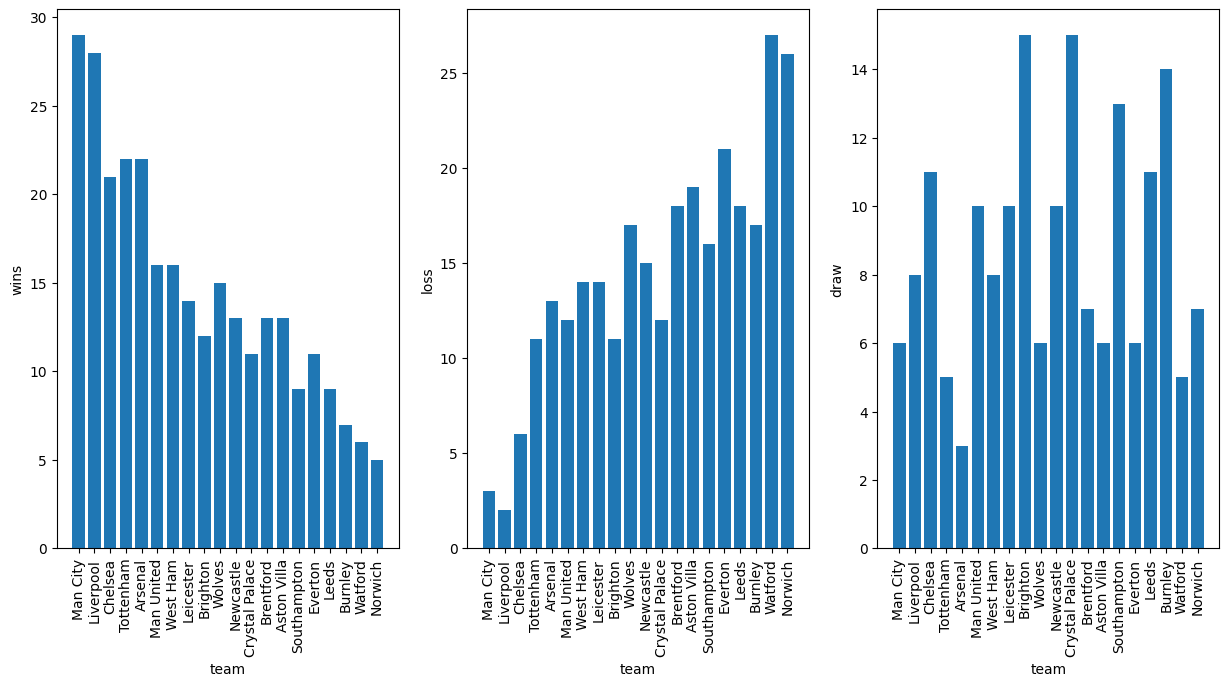

In [691]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.bar(table.Team, table.win)
plt.xlabel('team')
plt.ylabel('wins')
plt.xticks(rotation='vertical')
plt.subplot(132)
plt.bar(table.Team, table.loss)
plt.xlabel('team')
plt.ylabel('loss')
plt.xticks(rotation='vertical')
plt.subplot(133)
plt.bar(table.Team, table.draw)
plt.xlabel('team')
plt.ylabel('draw')
plt.xticks(rotation='vertical')
plt.show()

joining the 2 tables specifying the columns.

In [692]:
table = table.merge(shot_conv, left_on=['Team', 'gf'],right_on=['Team','gf'])
table.head()

,Team,played,win,draw,loss,gf,ga,gd,points,fouls,shots,shots on target,conversion rate
0,Man City,38,29,6,3,99,26,73,93,640,715,254,0.14
1,Liverpool,38,28,8,2,94,26,68,92,726,730,256,0.13
2,Chelsea,38,21,11,6,76,33,43,74,818,592,211,0.13
3,Tottenham,38,22,5,11,69,40,29,71,772,491,198,0.14
4,Arsenal,38,22,3,13,61,48,13,69,726,588,197,0.10


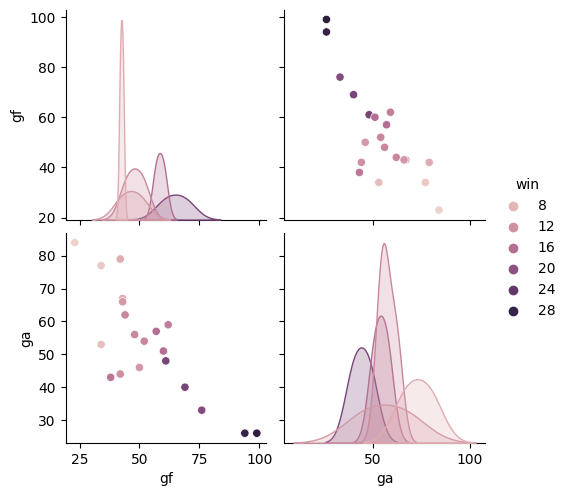

In [693]:
sns.pairplot(data=table, vars=['gf','ga'], hue = 'win')

<Axes: >

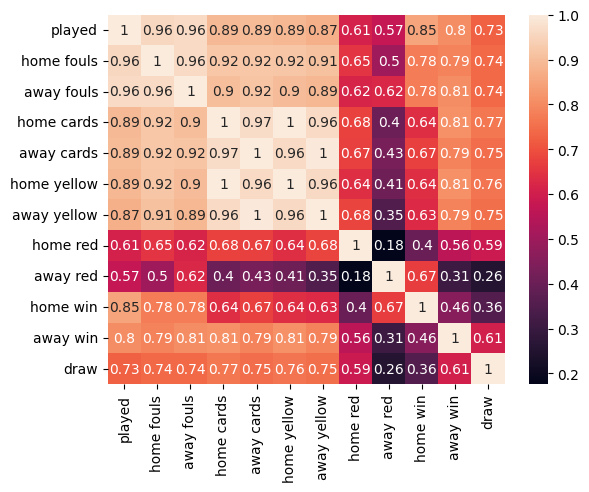

In [694]:
sns.heatmap(data=referees.corr(), annot=True)

<Axes: >

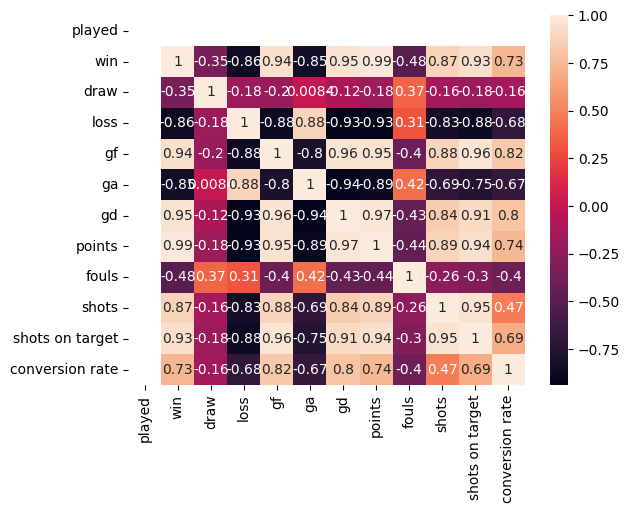

In [695]:
sns.heatmap(data=table.corr(), annot=True)

strong correlation between gd & win, loss & ga

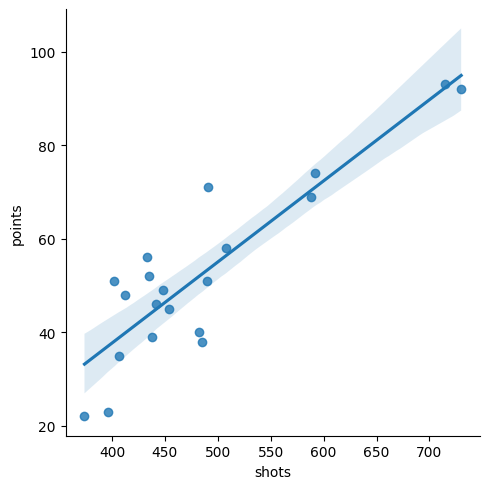

In [696]:
sns.lmplot(data=table, x='shots', y='points')

In [697]:
X=table[['gd']]
y=table['points']

In [698]:
reg = LinearRegression().fit(X,y)

In [699]:
reg.predict([[27]])

array([67.59875828])

In [700]:
def points(gd):
  gd_arr = np.array([[gd]])
  return round(reg.predict(gd_arr)[0])

In [701]:
points(45)

78

In [702]:
reg.score(X,y)

0.9436350405003232

our model has an impressive score of .943 lets see can we improve it by adding in the extra feature to try and help our model

*   shots
*   fouls

In [703]:
X=table[['gd','fouls',]]
y=table['points']

In [704]:
reg = LinearRegression().fit(X,y)

In [705]:
def point(gd,fouls):
  points_arr = np.array([[gd,fouls]])
  return round(reg.predict(points_arr)[0])

In [706]:
point(-59,450)

23

In [707]:
reg.score(X,y)

0.9442094965461294

this took the score up to .96

this can be used by teams. lets take for example to win the league it took 93 points so teams can aim for small targets to reach during games that will build them up to 93 points by the end of the season

In [709]:
point(50,500)

82

so if we devide this by 38...ie 38 games a season, we get an average of 31 shots per game and maximum of 13 fouls a game. along with a score difference of 76. teams can then buy players that get many shots a game to try and take the teams shot count up towards the target number along with buying players who commit low number of fouls per game.

In [710]:
print(reg.coef_)

[ 0.54895996 -0.00725273]


result explained:
gd: 0.4
shots: 0.022
fouls: -0.15

these values tell us that if goal difference increases by 1 the points incrase by 0.4
or if shots increase by 1 the points increase by 0.22
or if fouls decrease by 1 the points increase by 0.15

In [ ]:
point(86,1200,500)

trying the coefficiant:
plus 10 goals with same shots and fouls gives 99 points
94 + (10*0.41656705) = 98.1...rounded to 98

In [ ]:
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [ ]:
output_notebook()

In [ ]:
import bokeh.sampledata
bokeh.sampledata.download()